<a href="https://colab.research.google.com/github/Izhankhan99k/Machine-learning/blob/main/mnist_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


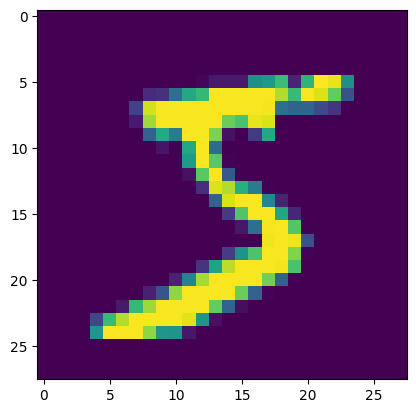

In [13]:
plt.imshow(x_train[0])

In [15]:
#we are dividing x_train by 255 to make it in between 0-1
X_train=x_train/255
X_test=x_test/255

In [19]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [29]:
his=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0118 - val_loss: 0.1001
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0106 - val_loss: 0.1118
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0078 - val_loss: 0.0964
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0079 - val_loss: 0.1159
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0074 - val_loss: 0.1031
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0040 - val_loss: 0.1146
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0080 - val_loss: 0.1117
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0052 - val_loss: 0.1302
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0062 - val_loss: 0.1167
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0049 - val_loss: 0.1222


In [34]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.2513423e-10, 2.2189749e-13, 3.0851810e-13, ..., 9.9999958e-01,
        1.0515118e-09, 3.1429997e-07],
       [9.6715376e-16, 3.4109743e-10, 9.9999994e-01, ..., 1.2984304e-26,
        6.3732982e-12, 5.7680526e-30],
       [1.4771252e-11, 9.9999720e-01, 9.2700856e-07, ..., 6.0455670e-07,
        1.1879144e-06, 8.6415423e-11],
       ...,
       [3.5275419e-22, 2.5973147e-17, 3.5264806e-21, ..., 2.0871029e-11,
        1.5502622e-13, 4.6204427e-08],
       [3.6844866e-21, 2.3349907e-21, 9.3331095e-26, ..., 9.0084218e-19,
        2.9545039e-10, 1.9124576e-20],
       [1.9199622e-15, 2.3652693e-25, 1.7476093e-18, ..., 2.1350209e-22,
        3.1052570e-19, 2.8514877e-21]], dtype=float32)

In [27]:
y_pred=y_prob.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9737

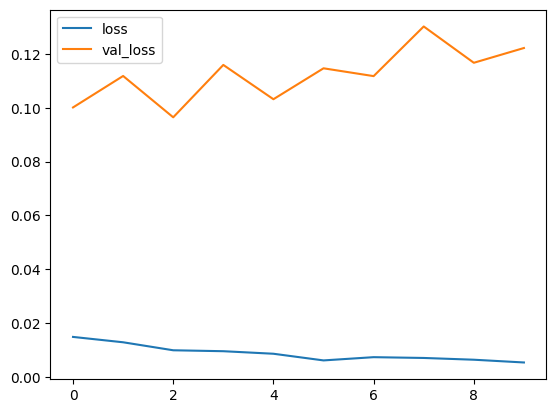

In [31]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

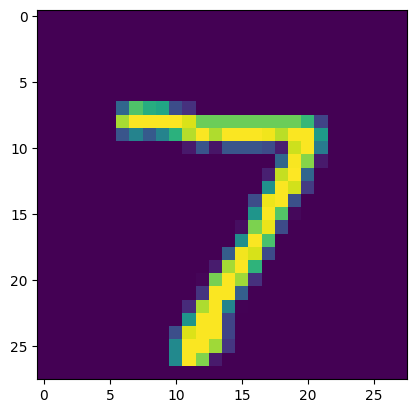

In [32]:
plt.imshow(x_test[0])

In [33]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([7])